<a href="https://colab.research.google.com/github/IkramuddinAhmed/ADL_Project/blob/main/Model_3_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
import matplotlib as mlb
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [ ]:
df = pd.read_csv('TX_calamities.csv')
df.head()

,Date,Calamity_Flood,Calamity_Hurricane,Calamity_Tornado,Calamity_None
0,1953-05-31 00:00:00+00:00,0,0,1,0
1,1953-06-30 00:00:00+00:00,1,0,0,0
2,1953-07-31 00:00:00+00:00,0,0,0,1
3,1953-08-31 00:00:00+00:00,0,0,0,1
4,1953-09-30 00:00:00+00:00,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                808 non-null    object
 1   Calamity_Flood      808 non-null    int64 
 2   Calamity_Hurricane  808 non-null    int64 
 3   Calamity_Tornado    808 non-null    int64 
 4   Calamity_None       808 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 31.7+ KB


In [ ]:
#Separate dates for future plotting
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(15))

793   2019-06-30 00:00:00+00:00
794   2019-07-31 00:00:00+00:00
795   2019-08-31 00:00:00+00:00
796   2019-09-30 00:00:00+00:00
797   2019-10-31 00:00:00+00:00
798   2019-11-30 00:00:00+00:00
799   2019-12-31 00:00:00+00:00
800   2020-01-31 00:00:00+00:00
801   2020-02-29 00:00:00+00:00
802   2020-03-31 00:00:00+00:00
803   2020-04-30 00:00:00+00:00
804   2020-05-31 00:00:00+00:00
805   2020-06-30 00:00:00+00:00
806   2020-07-31 00:00:00+00:00
807   2020-08-31 00:00:00+00:00
Name: Date, dtype: datetime64[ns, UTC]


In [ ]:
train_dates.info()

<class 'pandas.core.series.Series'>
RangeIndex: 808 entries, 0 to 807
Series name: Date
Non-Null Count  Dtype              
--------------  -----              
808 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 6.4 KB


In [ ]:
#Variables for training
cols = list(df)[1:5]
print(cols)

['Calamity_Flood', 'Calamity_Hurricane', 'Calamity_Tornado', 'Calamity_None']


In [ ]:
df_for_training = df[cols].astype(float)
df_for_training.head()

,Calamity_Flood,Calamity_Hurricane,Calamity_Tornado,Calamity_None
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [ ]:
df_for_training = df_for_training.to_numpy(dtype = float)
df_for_training

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 4. We will make timesteps = 36 (past months data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 12   # Number of months we want to look into the future based on the past days.
n_past = 36  # Number of past months we want to use to predict the future.

In [ ]:
df_for_training.shape

(808, 4)

In [ ]:
df_for_training

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
#Reformat input data into a shape: (n_samples x timesteps x n_features)
#my df_for_training_scaled has a shape (808, 4)
#808 refers to the number of data points and 4 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training) - n_future +1):
    trainX.append(df_for_training[i - n_past:i,0:df_for_training.shape[1]])
    trainY.append(df_for_training[i + n_future - 1:i + n_future])

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (761, 36, 4).
trainY shape == (761, 1, 4).


In [ ]:
trainY = trainY.reshape(761,1*4)

In [ ]:
print('trainY shape == {}.'.format(trainY.shape))

trainY shape == (761, 4).


In [ ]:
# creating and fitting the LSTM network
model = Sequential()
model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences = True))
model.add(LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 36, 64)            17664     
                                                                 
 lstm_7 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 50,948
Trainable params: 50,948
Non-trainable params: 0
_________________________________________________________________


In [ ]:
METRICS = [
   
      
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      
]

In [ ]:
from keras import backend as K

import dill

def categorical_focal_loss(alpha, gamma=2.):
    """
    Softmax version of focal loss.
    When there is a skew between different categories/labels in your data set, you can try to apply this function as a
    loss.
           m
      FL = ∑  -alpha * (1 - p_o,c)^gamma * y_o,c * log(p_o,c)
          c=1
      where m = number of classes, c = class and o = observation
    Parameters:
      alpha -- the same as weighing factor in balanced cross entropy. Alpha is used to specify the weight of different
      categories/labels, the size of the array needs to be consistent with the number of classes.
      gamma -- focusing parameter for modulating factor (1-p)
    Default value:
      gamma -- 2.0 as mentioned in the paper
      alpha -- 0.25 as mentioned in the paper
    References:
        Official paper: https://arxiv.org/pdf/1708.02002.pdf
        https://www.tensorflow.org/api_docs/python/tf/keras/backend/categorical_crossentropy
    Usage:
     model.compile(loss=[categorical_focal_loss(alpha=[[.25, .25, .25]], gamma=2)], metrics=["accuracy"], optimizer=adam)
    """

    alpha = np.array(alpha, dtype=np.float32)

    def categorical_focal_loss_fixed(y_true, y_pred):
        """
        :param y_true: A tensor of the same shape as `y_pred`
        :param y_pred: A tensor resulting from a softmax
        :return: Output tensor.
        """

        # Clip the prediction value to prevent NaN's and Inf's
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Calculate Cross Entropy
        cross_entropy = -y_true * K.log(y_pred)

        # Calculate Focal Loss
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy

        # Compute mean loss in mini_batch
        return K.mean(K.sum(loss, axis=-1))

    return categorical_focal_loss_fixed


if __name__ == '__main__':

    # Test serialization of nested functions
   

    cat_inner = dill.loads(dill.dumps(categorical_focal_loss(gamma=2., alpha=.25)))
    print(cat_inner)

<function categorical_focal_loss_fixed at 0x7f76b466faf0>


In [ ]:
model.compile(loss=[categorical_focal_loss(alpha=[[.29, .29, .29, .13]], gamma=2)], optimizer='adam', metrics = METRICS)

In [ ]:
history = model.fit(trainX, trainY, epochs=50, batch_size=6, validation_split=0.1)

Epoch 1/50
114/114 [==============================] - 6s 27ms/step - loss: 0.0360 - accuracy: 0.9467 - precision: 0.9153 - recall: 0.8671 - val_loss: 0.0324 - val_accuracy: 0.9253 - val_precision: 0.8857 - val_recall: 0.8052
Epoch 2/50
114/114 [==============================] - 2s 18ms/step - loss: 0.0316 - accuracy: 0.9492 - precision: 0.9212 - recall: 0.8713 - val_loss: 0.0330 - val_accuracy: 0.9253 - val_precision: 0.8971 - val_recall: 0.7922
Epoch 3/50
114/114 [==============================] - 2s 17ms/step - loss: 0.0286 - accuracy: 0.9481 - precision: 0.9221 - recall: 0.8655 - val_loss: 0.0401 - val_accuracy: 0.9351 - val_precision: 0.8904 - val_recall: 0.8442
Epoch 4/50
114/114 [==============================] - 2s 17ms/step - loss: 0.0298 - accuracy: 0.9444 - precision: 0.9156 - recall: 0.8567 - val_loss: 0.0424 - val_accuracy: 0.9026 - val_precision: 0.8507 - val_recall: 0.7403

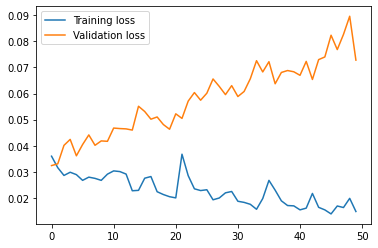

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
#Forecasting
#as inputs for prediction. We only have all 4 variables until the last day in our dataset.
n_future = 73
n_months_for_prediction=72  #let us predict past 72 months

forecast_period_dates = pd.date_range(list(train_dates)[-n_future], periods=n_months_for_prediction, freq='M').tolist()
print(forecast_period_dates)


[Timestamp('2014-08-31 00:00:00+0000', tz='UTC', freq='M'), Timestamp('2014-09-30 00:00:00+0000', tz='UTC', freq='M'), Timestamp('2014-10-31 00:00:00+0000', tz='UTC', freq='M'), Timestamp('2014-11-30 00:00:00+0000', tz='UTC', freq='M'), Timestamp('2014-12-31 00:00:00+0000', tz='UTC', freq='M'), Timestamp('2015-01-31 00:00:00+0000', tz='UTC', freq='M'), Timestamp('2015-02-28 00:00:00+0000', tz='UTC', freq='M'), Timestamp('2015-03-31 00:00:00+0000', tz='UTC', freq='M'), Timestamp('2015-04-30 00:00:00+0000', tz='UTC', freq='M'), Timestamp('2015-05-31 00:00:00+0000', tz='UTC', freq='M'), Timestamp('2015-06-30 00:00:00+0000', tz='UTC', freq='M'), Timestamp('2015-07-31 00:00:00+0000', tz='UTC', freq='M'), Timestamp('2015-08-31 00:00:00+0000', tz='UTC', freq='M'), Timestamp('2015-09-30 00:00:00+0000', tz='UTC', freq='M'), Timestamp('2015-10-31 00:00:00+0000', tz='UTC', freq='M'), Timestamp('2015-11-30 00:00:00+0000', tz='UTC', freq='M'), Timestamp('2015-12-31 00:00:00+0000', tz='UTC', freq='M

In [ ]:
# Convert timestamp to date
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())

print(forecast_dates)

[datetime.date(2014, 8, 31), datetime.date(2014, 9, 30), datetime.date(2014, 10, 31), datetime.date(2014, 11, 30), datetime.date(2014, 12, 31), datetime.date(2015, 1, 31), datetime.date(2015, 2, 28), datetime.date(2015, 3, 31), datetime.date(2015, 4, 30), datetime.date(2015, 5, 31), datetime.date(2015, 6, 30), datetime.date(2015, 7, 31), datetime.date(2015, 8, 31), datetime.date(2015, 9, 30), datetime.date(2015, 10, 31), datetime.date(2015, 11, 30), datetime.date(2015, 12, 31), datetime.date(2016, 1, 31), datetime.date(2016, 2, 29), datetime.date(2016, 3, 31), datetime.date(2016, 4, 30), datetime.date(2016, 5, 31), datetime.date(2016, 6, 30), datetime.date(2016, 7, 31), datetime.date(2016, 8, 31), datetime.date(2016, 9, 30), datetime.date(2016, 10, 31), datetime.date(2016, 11, 30), datetime.date(2016, 12, 31), datetime.date(2017, 1, 31), datetime.date(2017, 2, 28), datetime.date(2017, 3, 31), datetime.date(2017, 4, 30), datetime.date(2017, 5, 31), datetime.date(2017, 6, 30), datetime.d

In [ ]:
#Make prediction
prediction = model.predict(trainX[-n_months_for_prediction:]) 

In [ ]:
prediction.shape

(72, 4)

In [ ]:
prediction

array([[2.83101946e-01, 8.91133491e-03, 4.37930673e-02, 6.64193690e-01],
       [2.83101946e-01, 8.91133491e-03, 4.37930673e-02, 6.64193690e-01],
       [2.83101946e-01, 8.91133491e-03, 4.37930673e-02, 6.64193690e-01],
       [2.83101946e-01, 8.91133491e-03, 4.37930673e-02, 6.64193690e-01],
       [2.83101946e-01, 8.91133491e-03, 4.37930673e-02, 6.64193690e-01],
       [2.83101946e-01, 8.91133491e-03, 4.37930673e-02, 6.64193690e-01],
       [2.83101946e-01, 8.91133491e-03, 4.37930673e-02, 6.64193690e-01],
       [2.83101946e-01, 8.91133491e-03, 4.37930673e-02, 6.64193690e-01],
       [2.83101946e-01, 8.91133491e-03, 4.37930673e-02, 6.64193690e-01],
       [2.83101946e-01, 8.91133491e-03, 4.37930673e-02, 6.64193690e-01],
       [2.83101946e-01, 8.91133491e-03, 4.37930673e-02, 6.64193690e-01],
       [2.83101946e-01, 8.91133491e-03, 4.37930673e-02, 6.64193690e-01],
       [2.83101946e-01, 8.91133491e-03, 4.37930673e-02, 6.64193690e-01],
       [2.83101946e-01, 8.91133491e-03, 4.37930673e

In [ ]:
ypred = prediction
ypred[:,0]

array([0.28310195, 0.28310195, 0.28310195, 0.28310195, 0.28310195,
       0.28310195, 0.28310195, 0.28310195, 0.28310195, 0.28310195,
       0.28310195, 0.28310195, 0.28310195, 0.28310195, 0.28310195,
       0.28310195, 0.28310195, 0.28310195, 0.28310195, 0.28310195,
       0.28310195, 0.28310195, 0.28310195, 0.28310195, 0.28310195,
       0.28310195, 0.28310195, 0.28310195, 0.28310195, 0.28310195,
       0.32024533, 0.43686342, 0.6771975 , 0.77795297, 0.67426425,
       0.4567222 , 0.33946228, 0.302433  , 0.2697081 , 0.18579656,
       0.0745567 , 0.05513889, 0.13990347, 0.13911974, 0.04093367,
       0.02127222, 0.04176483, 0.12307753, 0.22943649, 0.33030158,
       0.38688368, 0.38312972, 0.3208394 , 0.2337679 , 0.1826879 ,
       0.18721272, 0.22923149, 0.27678472, 0.33134001, 0.40462032,
       0.45950073, 0.43982598, 0.23095025, 0.0951801 , 0.07426079,
       0.08234254, 0.10781485, 0.02978991, 0.07943176, 0.18233296,
       0.05772372, 0.02478659], dtype=float32)

In [ ]:
np.argmax(ypred, axis=1)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 1, 3])

In [ ]:
y_original = original.values
np.argmax(y_original[:,1:5], axis=1)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 1])

In [ ]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Calamity_Flood':ypred[:,0], 'Calamity_Hurricane':ypred[:,1], 'Calamity_Tornado':ypred[:,2], 'Calamity_None': ypred[:,3]})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [ ]:
df_forecast.head(10)

,Date,Calamity_Flood,Calamity_Hurricane,Calamity_Tornado,Calamity_None
0,2014-08-31,0.283102,0.008911,0.043793,0.664194
1,2014-09-30,0.283102,0.008911,0.043793,0.664194
2,2014-10-31,0.283102,0.008911,0.043793,0.664194
3,2014-11-30,0.283102,0.008911,0.043793,0.664194
4,2014-12-31,0.283102,0.008911,0.043793,0.664194
5,2015-01-31,0.283102,0.008911,0.043793,0.664194
6,2015-02-28,0.283102,0.008911,0.043793,0.664194
7,2015-03-31,0.283102,0.008911,0.043793,0.664194
8,2015-04-30,0.283102,0.008911,0.043793,0.664194
9,2015-05-31,0.283102,0.008911,0.043793,0.664194


In [ ]:
original = df
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2014-08-31']

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Calamity_Flood'>

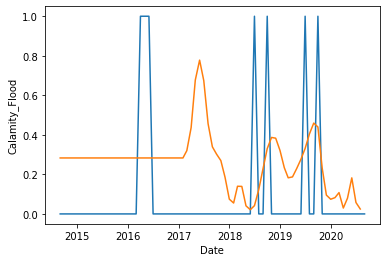

In [ ]:
sns.lineplot(original['Date'], original['Calamity_Flood'])
sns.lineplot(df_forecast['Date'], df_forecast['Calamity_Flood'])

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Calamity_Hurricane'>

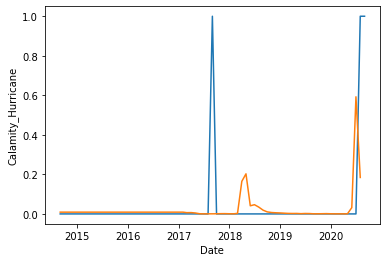

In [ ]:
sns.lineplot(original['Date'], original['Calamity_Hurricane'])
sns.lineplot(df_forecast['Date'], df_forecast['Calamity_Hurricane'])

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Calamity_Tornado'>

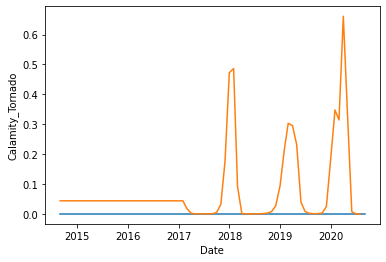

In [ ]:
sns.lineplot(original['Date'], original['Calamity_Tornado'])
sns.lineplot(df_forecast['Date'], df_forecast['Calamity_Tornado'])

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Calamity_None'>

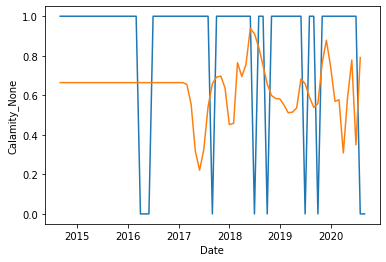

In [ ]:
sns.lineplot(original['Date'], original['Calamity_None'])
sns.lineplot(df_forecast['Date'], df_forecast['Calamity_None'])

In [ ]:
model = Get model (Sequential, Functional Model, or Model subclass)

In [ ]:
model.save('model.h5')